Imports

In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

random.seed(1)

Data

In [70]:
X = np.array([random.gauss(0, 1) for _ in range(100)])
eps = np.array([random.gauss(0, sqrt(0.25)) for _ in range(100)])

Y = -1 + 0.5*X + eps

Metrics

In [71]:
def mse(y_true, y_pred):
    return sum((y_true - y_pred)**2) / len(y_true)

def tss(y_true):
    return sum((y_true - y_true.mean())**2)

def rss(y_true, y_pred):
    return sum((y_true - y_pred)**2)

def r_squared(y_true, y_pred):
    return 1 - rss(y_true, y_pred) / tss(y_true)

Linear Regression

In [72]:
def calc_estimators(X, Y):
    beta_1 = sum((X - np.mean(X))* (Y - Y.mean())) / sum((X - X.mean())**2)
    beta_0 = Y.mean() - beta_1 * X.mean()
    return beta_0, beta_1

In [73]:
print(f"beta_0 = -1, beta_1 = 0.5")
beta_0, beta_1 = calc_estimators(X, Y)
print(f"beta'_0 = {beta_0:.4f}, beta'_1 = {beta_1:.4f}")

beta_0 = -1, beta_1 = 0.5
beta'_0 = -0.9213, beta'_1 = 0.4510


Relationship

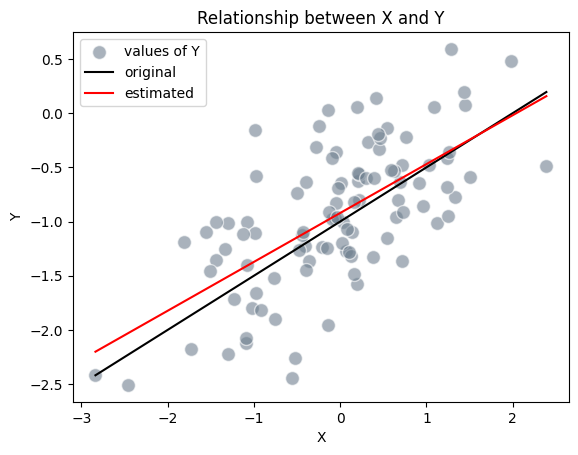

Original MSE: 0.24845490784803245
Estimated MSE: 0.23975006721224446
Original R^2: 0.4073496725901111
Estimated R^2: 0.4281137085978286


In [74]:
x_values = np.linspace(min(X), max(X), 100)
original_values = -1 + 0.5 * x_values
estimated_values = beta_0 + beta_1 * x_values

plt.scatter(X, Y, color="slategrey", alpha=0.6, edgecolors="w", s=100, label="values of Y")
plt.plot(x_values, original_values, color="black", label=f"original")
plt.plot(x_values, estimated_values, color="red", label=f"estimated")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Relationship between X and Y")
plt.legend()
plt.show()


print(f"Original MSE: {mse(Y, -1 + 0.5*X)}")
print(f"Estimated MSE: {mse(Y, beta_0 + beta_1*X)}")

print(f"Original R^2: {r_squared(Y, -1 + 0.5*X)}")
print(f"Estimated R^2: {r_squared(Y, beta_0 + beta_1*X)}")

Polynomial regression
$$
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^m \\
1 & x_2 & x_2^2 & \cdots & x_2^m \\
1 & x_3 & x_3^2 & \cdots & x_3^m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^m
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\vdots \\
\epsilon_n
\end{bmatrix}
$$

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$


β = [-0.8988475   0.44284569 -0.02584511]


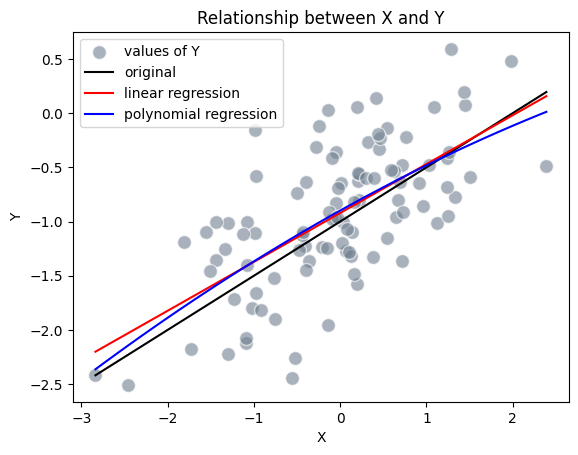

Original MSE: 0.24845490784803245
Linear MSE: 0.23975006721224446
Polynomial MSE: 0.23865694262569878

Original R^2: 0.4073496725901111
Linear R^2: 0.4281137085978286
Polynomial R^2: 0.43072118634792533


In [119]:
X_matrix = np.column_stack([X**i for i in range(3)])

beta_vector = np.matmul(
    np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix)),
    np.matmul(X_matrix.transpose(), Y),
)
print(f"\u03B2 = {beta_vector}")

x_values = np.linspace(min(X), max(X), 100)
original_values = -1 + 0.5 * x_values
estimated_1d_values = beta_0 + beta_1 * x_values
estimated_2d_values = beta_vector[0] + beta_vector[1] * x_values + beta_vector[2] * x_values**2

plt.scatter(X, Y, color="slategrey", alpha=0.6, edgecolors="w", s=100, label="values of Y")
plt.plot(x_values, original_values, color="black", label=f"original")
plt.plot(x_values, estimated_1d_values, color="red", label=f"linear regression")
plt.plot(x_values, estimated_2d_values, color="blue", label=f"polynomial regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Relationship between X and Y")
plt.legend()
plt.show()


print(f"Original MSE: {mse(Y, -1 + 0.5*X)}")
print(f"Linear MSE: {mse(Y, beta_0 + beta_1*X)}")
print(f"Polynomial MSE: {mse(Y, beta_vector[0] + beta_vector[1]*X + beta_vector[2] * X**2)}")
print()
print(f"Original R^2: {r_squared(Y, -1 + 0.5*X)}")
print(f"Linear R^2: {r_squared(Y, beta_0 + beta_1*X)}")
print(f"Polynomial R^2: {r_squared(Y, beta_vector[0] + beta_vector[1]*X + beta_vector[2] * X**2)}")